In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tabulate import tabulate

In [ ]:
data_train_raw = pd.read_csv("A2Q2Data_train.csv")
data_test = pd.read_csv("A2Q2Data_test.csv")
data_train = np.array(data_train_raw)
data_test = np.array(data_test)
print(tabulate(data_test))
data_test.shape

### Calculating X and y from data

In [142]:
n = 10000 # Data points in train dataset
n_test = 500 # Data points in test dataset
d = 100 # No. of features
y = np.zeros((n)) # Labels for datapoints

X = np.zeros((d,n))
for i in range(n):
    for j in range(d):
        X[j][i] = data_train[i][j]

for i in range(n):
    y[i] = data_train[i][100]

## i. Computing least square solution

In [143]:
# Step 1:- Transpose the Feature matrix X
X_trans = X.T

# Step 2:- Compute XXt
XXt = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        XXt[i][j] = np.dot(X[i],X_trans[:,j])

# Step 3:- Compute the pseudo inverse of XXt
XXt_inv = np.linalg.pinv(XXt) 

# Step 4:- Compute (XXt)^-1*X
mat = np.zeros((d,n))
for i in range(d):
    for j in range(n):
        mat[i][j] = np.dot(XXt_inv[i],X[:,j])

# Step 5:- Mutliply (XXt)^-1*X with y and get W_ml
W_ml = np.zeros((d))
for i in range(d):
    W_ml[i] = np.dot(mat[i],y)
print(W_ml)

[-7.84961008e-03 -1.36715320e-02 -3.61656438e-03  2.64909162e-03
  1.88551446e-01  2.65314657e-03  9.46531787e-03  1.79809482e-01
  3.73757317e-03  4.99608944e-01  8.35836264e-03  4.29108775e-03
  1.42141179e-02  3.94232414e-03  9.36795890e-03 -1.12038274e-03
  3.35727498e-03  1.16152213e-03 -9.40884704e-03 -2.45575474e-03
 -1.17409629e-02 -1.01960612e-02  7.95771320e-03 -1.00574853e-02
  6.04882939e-03 -4.67345193e-03 -3.09091547e-03  8.14909191e-03
  1.20264599e-02 -6.82458167e-03 -8.65405539e-03  9.86273489e-04
  4.92968012e-03  5.99772460e-03 -1.34667859e-02  1.07075730e-03
  1.32745992e-02 -1.14148742e-02 -2.01056697e-02  5.85096240e-01
  4.94483255e-04 -7.86666917e-04 -2.71926574e-03 -9.54021938e-03
 -5.44161059e-03  9.80679209e-03 -6.72540624e-03 -4.45414300e-04
  6.98516510e-03  3.16138907e-02  4.51763485e-01 -8.75221378e-03
  2.55167390e-03  4.24921149e-03  2.89847927e-01  7.03723254e-03
 -1.95796945e-03  1.41523883e-02 -1.06508170e-02  7.72743903e-01
 -5.67126047e-03 -6.30026

## ii. Gradient Descent Algorithm

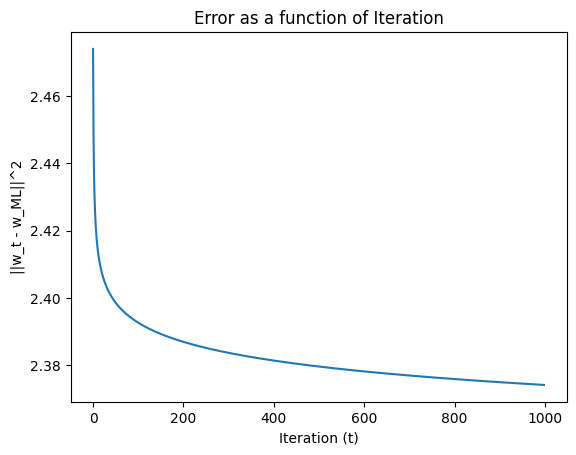

In [144]:
def grad_func(X,XXt,y,w):
    temp1 = np.zeros((d))
    for i in range(d):
        temp1[i] = np.dot(XXt[i],w)
    temp2 = np.zeros((d))
    for i in range(d):
       temp2[i] = np.dot(X[i],y)
    return 2*(temp1 - temp2)

T = 1000 # No. of rounds
learning_rate = 0.000001

w_grad = np.zeros((T,d))
for i in range(T-1):
    temp1 = grad_func(X,XXt,y,w_grad[i])
    inta = learning_rate / (i+1) # Step size
    w_grad[i + 1] = w_grad[i] - inta * temp1

norms_grad = np.zeros((T-1))
for i in range(1,T):
    norms_grad[i-1] = np.linalg.norm(w_grad[i]-W_ml)**2

plt.plot(norms_grad)
plt.xlabel('Iteration (t)')
plt.ylabel('||w_t - w_ML||^2')
plt.title('Error as a function of Iteration')
plt.show()

## iii. Stochastic Gradient Descent Algorithm

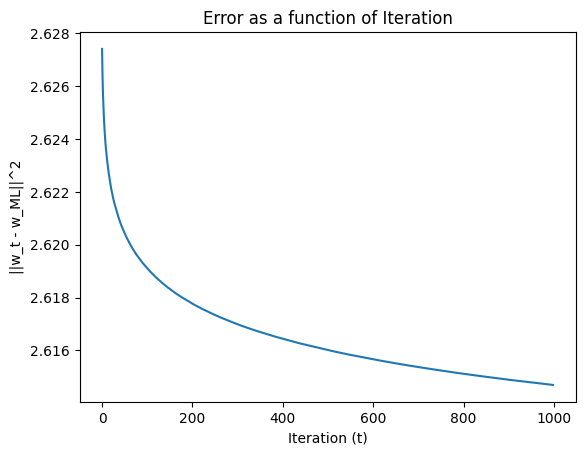

In [145]:
T_SGD = 1000 # No.of rounds
learning_rate_SGD = 0.000001
Q = 100 # Batch size

def del_func_SGD(data_SGD,w):
    X_SGD = np.zeros((d,Q))
    for i in range(Q):
        for j in range(d):
            X_SGD[j][i] = data_SGD[i][j]
    
    y_SGD = np.zeros((Q)) # Labels for datapoints
    for i in range(Q):
        y_SGD[i] = data_SGD[i][100]

    X_trans_SGD = X_SGD.T
    XXt_SGD = np.zeros((d,d))
    XXt_SGD = np.dot(X_SGD,X_trans_SGD)
        
    temp1 = np.zeros((d))
    temp1 = np.dot(XXt_SGD,w)

    temp2 = np.zeros((d))
    temp2 = np.dot(X_SGD,y_SGD)
    return 2*(temp1 - temp2)

W_SGD = np.zeros((T_SGD,d))
for i in range(T_SGD-1):
    data_SGD = data_train_raw.sample(frac=0.01)
    data_SGD = np.array(data_SGD)
    temp1 = del_func_SGD(data_SGD,W_SGD[i])
    inta = learning_rate_SGD / (i + 1) # Step size
    W_SGD[i + 1] = W_SGD[i] - inta * temp1

norms_SGD = np.zeros((T-1))
for i in range(1,T):
    norms_SGD[i-1] = np.linalg.norm(W_SGD[i]-W_ml)**2

plt.plot(norms_SGD)
plt.xlabel('Iteration (t)')
plt.ylabel('||w_t - w_ML||^2')
plt.title('Error as a function of Iteration')
plt.show()

## iv. Ridge Regression

In [146]:
def get_w(lamda,X_ridge,y_ridge):
    # Step 1:- Transpose the feature matrix
    X_ridge_trans = X_ridge.T
    
    # Step 2:- Compute XXt
    XXt_ridge = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            XXt_ridge[i][j] = np.dot(X_ridge[i],X_ridge_trans[:,j])

    # Step 3:- Compute XXt + λI
    for i in range(d):
        XXt_ridge[i][i] += lamda
    
    # Step 4:- Compute the pseudo inverse of XXt
    XXt_ridge_inv = np.linalg.pinv(XXt_ridge) 
    
    # Step 5:- Compute Xy
    mat = np.zeros((d,len(X_ridge[0])))
    for i in range(d):
        for j in range(len(X_ridge[0])):
            mat[i][j] = np.dot(XXt_ridge_inv[i],X_ridge[:,j])
    
    W_ridge = np.zeros((d))
    for i in range(d):
        W_ridge[i] = np.dot(mat[i],y_ridge)

    return W_ridge

def divide_dataset(X,y):
    # Shuffle the indices of the dataset
    indices = np.arange(n)
    np.random.shuffle(indices)
    
    # Calculate the split indices
    split_index = int(0.8 * n)
    
    # Split the indices into training and validation
    train_indices = indices[:split_index]
    val_indices = indices[split_index:]
    
    # Create training and validation datasets
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    return X_train,y_train,X_val,y_val

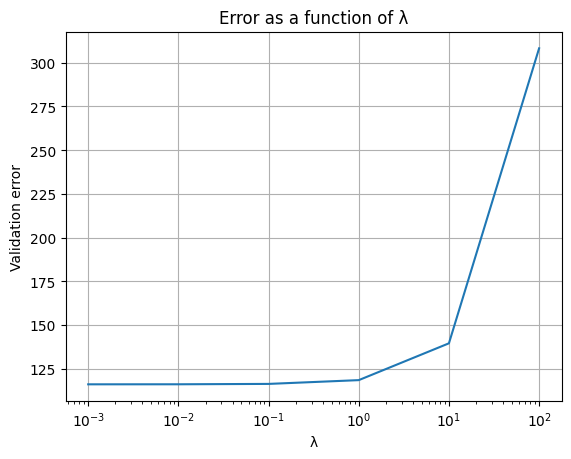

In [151]:
X_train,y_train,X_val,y_val = divide_dataset(X.T,y)
X_train = X_train.T
X_val = X_val.T

samples = 6
lambda_values = np.array((0.001,0.01,0.1,1,10,100))

W_ridge_train = np.zeros((samples,d))
error_val = np.zeros((samples))
for i in range(samples):
    W_ridge_train[i] = get_w(lambda_values[i],X_train,y_train)
    error_val[i] = np.linalg.norm(np.dot((X_val.T),W_ridge_train[i]) - y_val)**2 + lambda_values[i]*np.linalg.norm(W_ridge_train[i])**2

plt.plot(lambda_values,error_val)
plt.xlabel('λ')
plt.ylabel('Validation error')
plt.title('Error as a function of λ')
plt.xscale('log')
plt.grid(True)
plt.show()

### Computing Test error for W_ridge and W_ml

In [152]:
lamda = lambda_values[np.argmin(error_val)]
W_ridge = get_w(lamda,X_train,y_train)
print(W_ridge)

X_test = np.zeros((d,n_test))
for i in range(n_test):
    for j in range(d):
        X_test[j][i] = data_test[i][j]

y_test = np.zeros((n_test)) # Labels for datapoints
for i in range(n_test):
    y[i] = data_test[i][100]

error_test_ridge = 0.0
error_test_ml = 0.0
error_test_ml = np.linalg.norm(np.dot((X_test.T),W_ml) - y_test)**2 + lamda*np.linalg.norm(W_ml)**2
error_test_ridge = np.linalg.norm(np.dot((X_test.T),W_ridge) - y_test)**2 + lamda*np.linalg.norm(W_ridge)**2

print('error in test dataset from W_ml is ',error_test_ml)
print('error in test dataset from W_ridge is ',error_test_ridge)

[-6.47536459e-03 -1.59033021e-02 -4.22580659e-03  9.43994738e-03
  1.76614682e-01  1.15138252e-02  2.35764844e-02  1.69231192e-01
 -7.11860492e-03  4.81292019e-01  8.59210124e-03  4.05874940e-03
  1.50650241e-02  1.20160111e-02  1.03489302e-02 -6.43252971e-03
  1.15467274e-02  4.82279324e-03 -1.44170780e-03 -1.40001753e-03
 -1.09735600e-02  1.19075748e-04  1.45772920e-02  1.07471555e-03
  4.81887844e-03 -4.48697451e-03  4.81779440e-03  5.37569901e-04
  5.19161979e-03 -6.79195799e-03  3.31196369e-03 -1.28644571e-03
  1.37873375e-02 -2.54586319e-04 -2.02261517e-02  1.35262221e-02
  3.03032884e-02 -6.15321163e-03 -2.26080960e-02  5.54450369e-01
 -1.48254643e-03  3.79269539e-03  1.10094053e-03 -4.15309852e-03
  1.86557388e-04  2.21676687e-02 -9.19479268e-03 -9.17757394e-04
 -1.06176794e-03  3.06041308e-02  4.30249794e-01 -3.75955545e-03
 -5.57646904e-03  5.60947180e-03  2.83235195e-01  1.60357226e-02
  4.83427002e-03  1.16967188e-02 -1.54542730e-02  7.32394713e-01
  1.55327744e-02  4.07543